In [9]:
library(SingleCellExperiment)
library(Seurat)
library(mclust)
library(dplyr)

In [10]:
pdata <- readRDS("source/prdata.sagar")

In [11]:
seuset <- CreateSeuratObject(
    raw.data = pdata,
    min.cells = 3, 
    min.genes = 200,
    min.
)

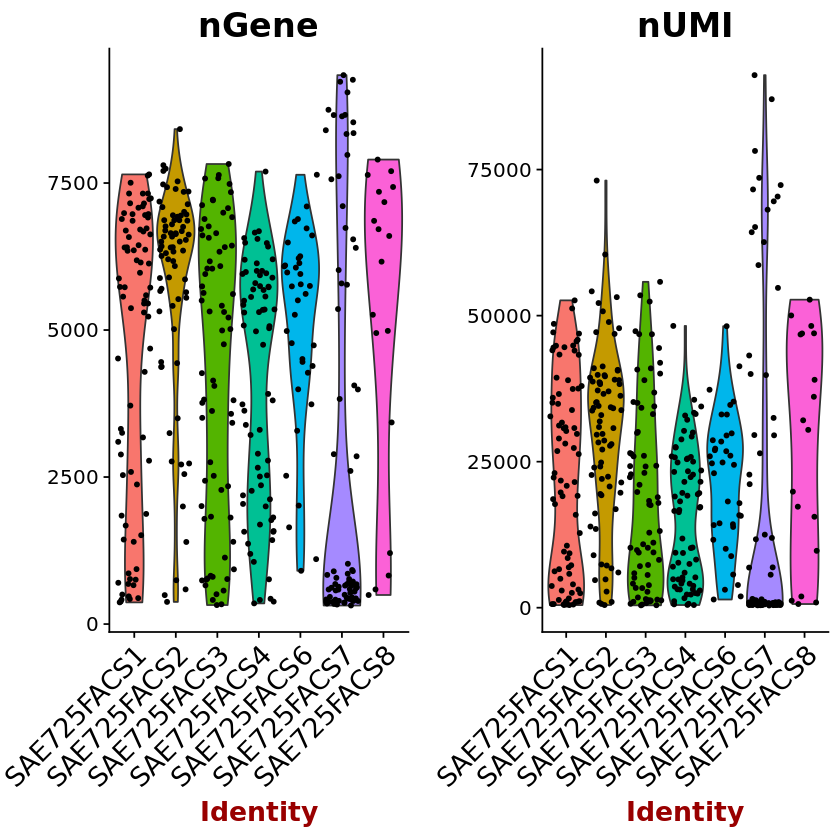

In [15]:
VlnPlot(
    object = seuset, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

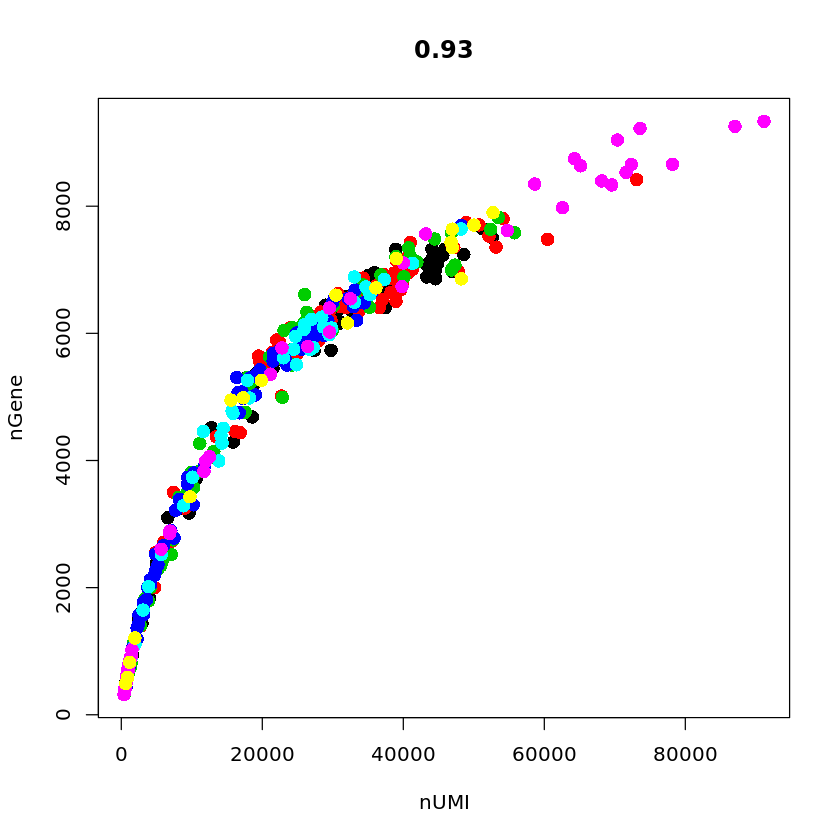

In [16]:
# Most counts are 0 except in Batch 6 where it's more spread.
# Batch 7 has some bias for low number of genes
GenePlot(
    object = seuset, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

In [20]:
seuset_f <- FilterCells(
    object = seuset, 
    subset.names = c("nUMI"), 
    high.thresholds = c(2e7),
    low.thresholds = c(3000)
)

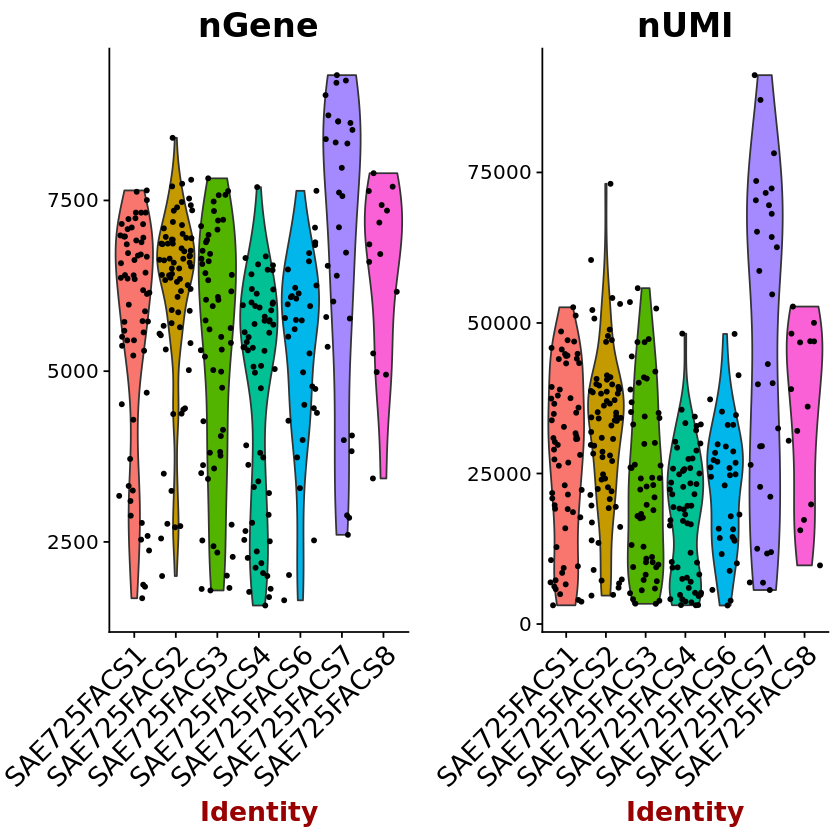

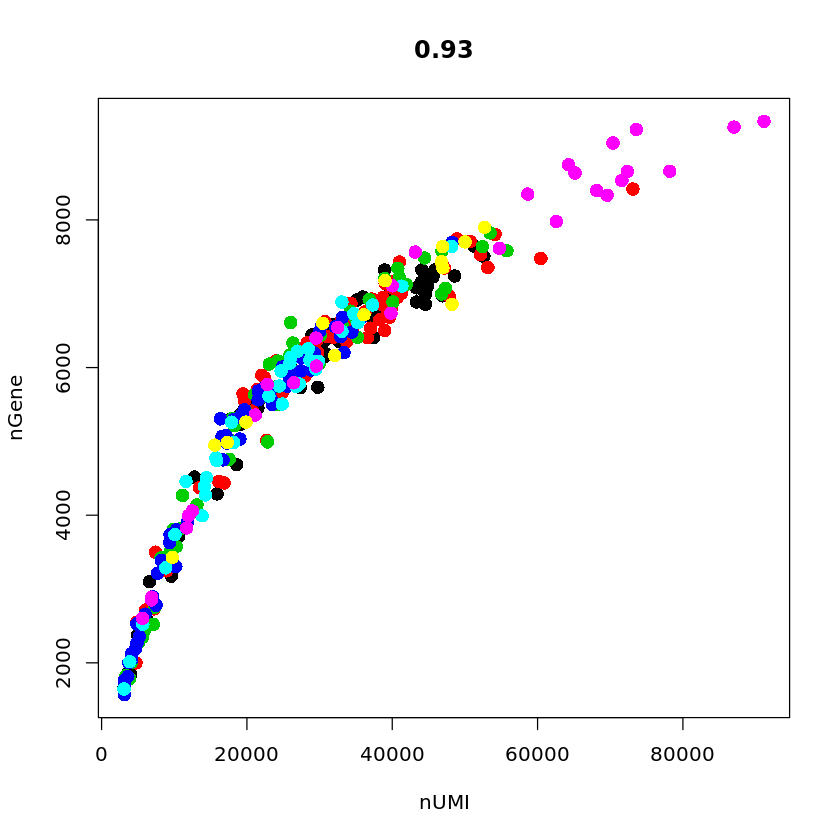

In [21]:
VlnPlot(
    object = seuset_f, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

GenePlot(
    object = seuset_f, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

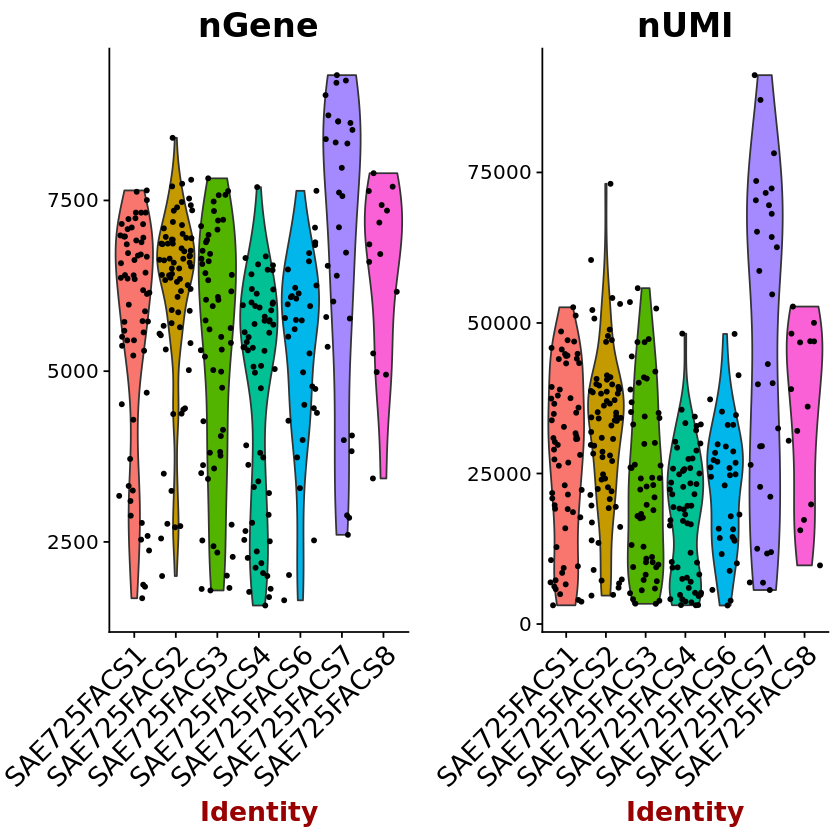

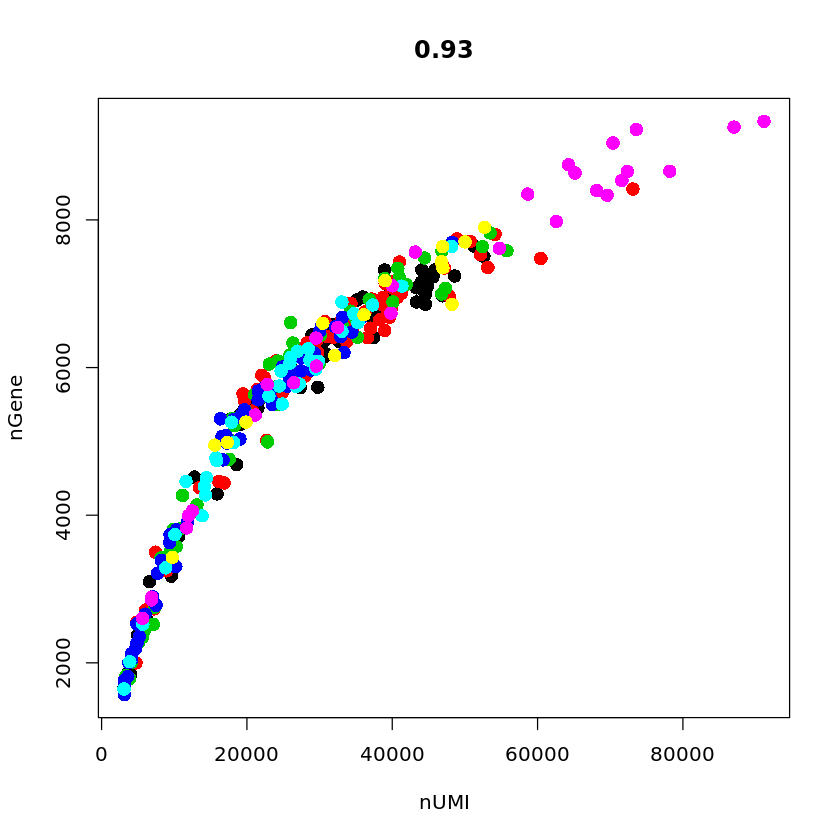

In [23]:
seuset_n <- NormalizeData(
    object = seuset_f, 
    normalization.method = "LogNormalize", 
    scale.factor = 10000
)

VlnPlot(
    object = seuset_n, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

GenePlot(
    object = seuset_n, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

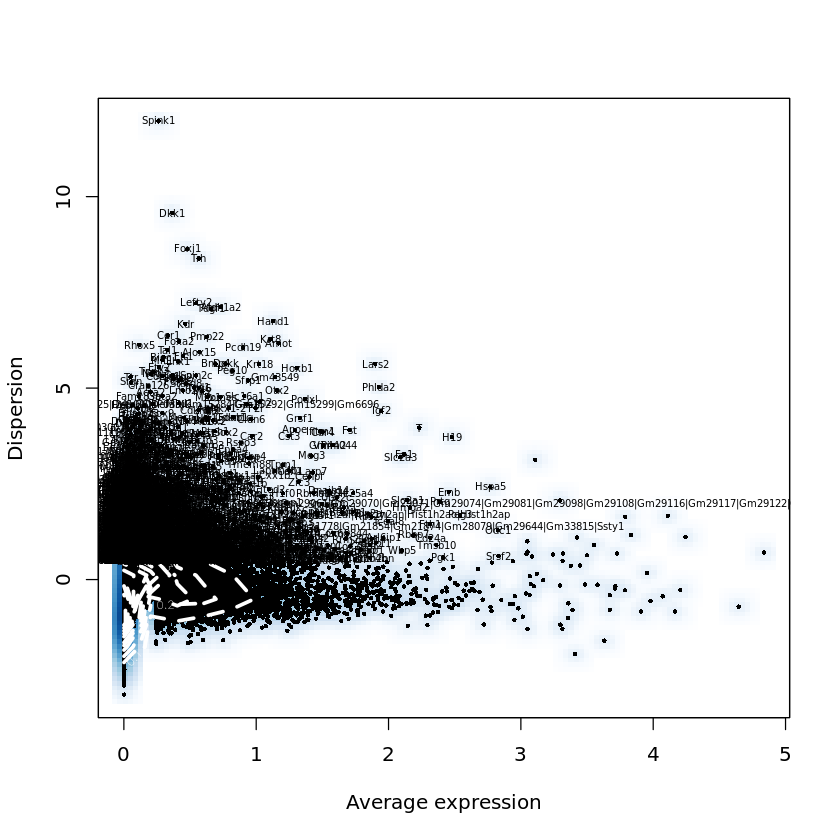

In [24]:
seuset_fvg <- FindVariableGenes(
    object = seuset_n,
    mean.function = ExpMean, 
    dispersion.function = LogVMR, 
    x.low.cutoff = 0.0125, 
    x.high.cutoff = 3, 
    y.cutoff = 0.5
)

In [27]:
length(x = seuset_fvg@var.genes)

seuset_sd <- ScaleData(
    object = seuset_fvg, 
    vars.to.regress = c("nUMI")
)

[1] 3452

[1] "Regressing out nUMI"
  |======================================================================| 100%
Time Elapsed:  37.1684534549713 secs
[1] "Scaling data matrix"
  |======================================================================| 100%


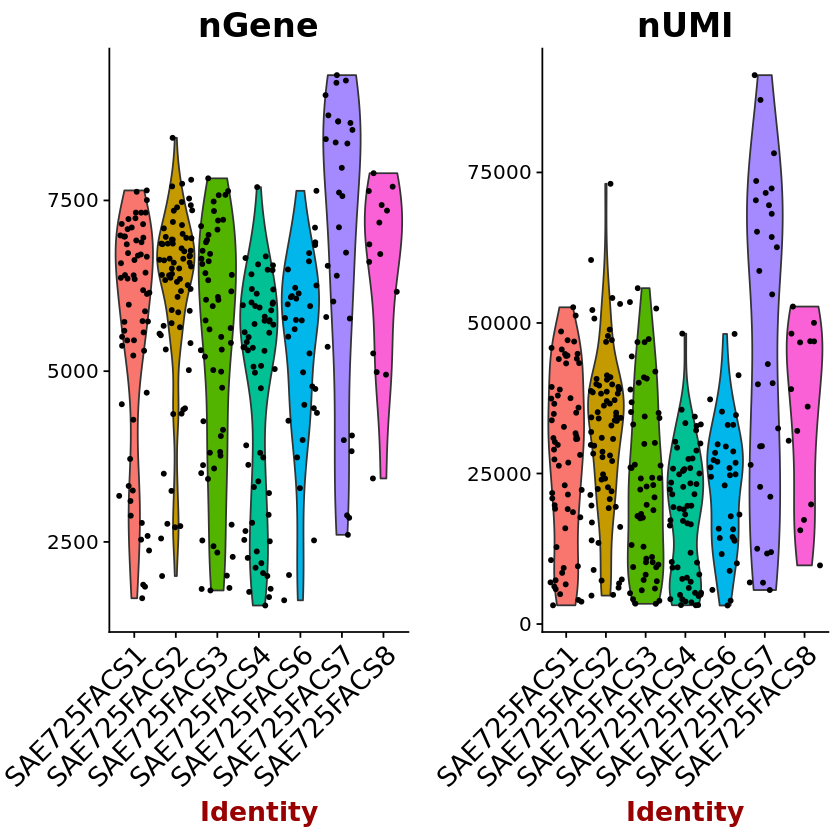

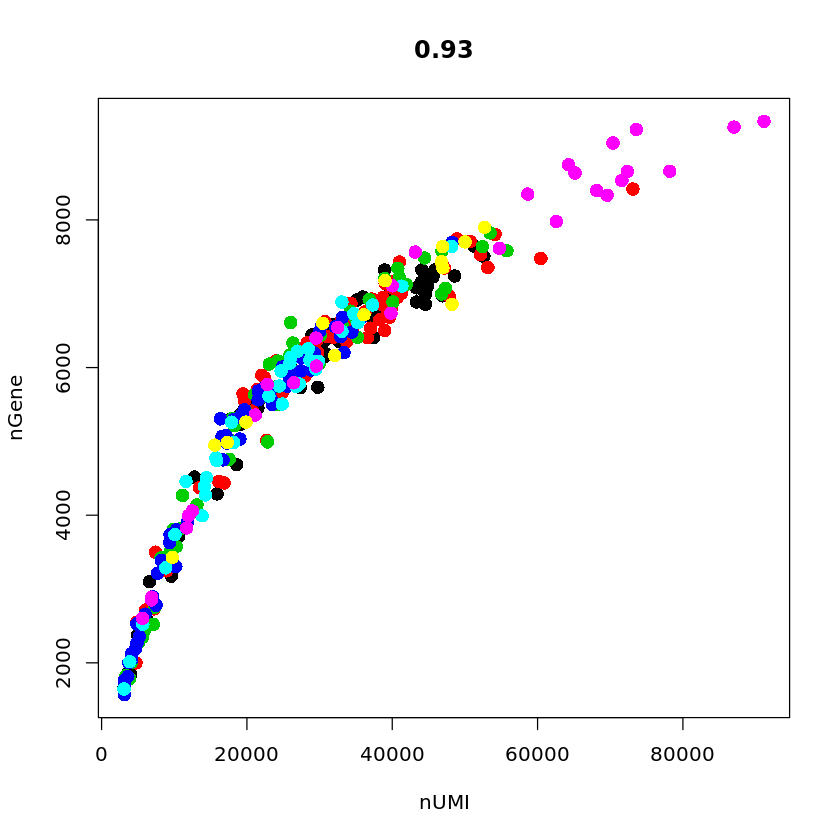

In [28]:
VlnPlot(
    object = seuset_sd, 
    features.plot = c("nGene", "nUMI"),
    x.lab.rot = 90,
    nCol = 2
)

GenePlot(
    object = seuset_sd, 
    gene1 = "nUMI", 
    gene2 = "nGene"
)

In [29]:
seuset_pca <- RunPCA(
    object = seuset_sd,
    pc.genes = seuset_sd@var.genes,
    do.print = TRUE,
    pcs.print = 1:5,
    genes.print = 5
)

[1] "PC1"
[1] "Srsf2" "Srm"   "Rrm2"  "Snhg1" "H19"  
[1] ""
[1] "Dnajb13"       "Fam183b"       "Pifo"          "Cfap126"      
[5] "1110017D15Rik"
[1] ""
[1] ""
[1] "PC2"
[1] "Igf2"  "H19"   "Rbms1" "Peg10" "Ppic" 
[1] ""
[1] "Pim2"   "Sox2"   "Cdh1"   "Pou5f1" "Zic5"  
[1] ""
[1] ""
[1] "PC3"
[1] "Hoxb1" "Meis2" "Tbx6"  "Fst"   "Dll3" 
[1] ""
[1] "Podxl"  "Slc2a3" "Cgnl1"  "Car4"   "Cldn6" 
[1] ""
[1] ""
[1] "PC4"
[1] "Slc2a3" "Meg3"   "Vangl1" "Iqgap1" "B3gnt7"
[1] ""
[1] "Foxc2"  "Rps27l" "Twist1" "Crabp1" "Irx1"  
[1] ""
[1] ""
[1] "PC5"
[1] "Pgk1"    "Akap12"  "Bex4"    "B4galt5" "Nkx1-2" 
[1] ""
[1] "Cer1"   "Spink1" "Eda"    "Hnf1b"  "Lcp1"  
[1] ""
[1] ""


[1] "PC1"
[1] "Srsf2" "Srm"   "Rrm2"  "Snhg1" "H19"  
[1] ""
[1] "Dnajb13"       "Fam183b"       "Pifo"          "Cfap126"      
[5] "1110017D15Rik"
[1] ""
[1] ""
[1] "PC2"
[1] "Igf2"  "H19"   "Rbms1" "Peg10" "Ppic" 
[1] ""
[1] "Pim2"   "Sox2"   "Cdh1"   "Pou5f1" "Zic5"  
[1] ""
[1] ""
[1] "PC3"
[1] "Hoxb1" "Meis2" "Tbx6"  "Fst"   "Dll3" 
[1] ""
[1] "Podxl"  "Slc2a3" "Cgnl1"  "Car4"   "Cldn6" 
[1] ""
[1] ""
[1] "PC4"
[1] "Slc2a3" "Meg3"   "Vangl1" "Iqgap1" "B3gnt7"
[1] ""
[1] "Foxc2"  "Rps27l" "Twist1" "Crabp1" "Irx1"  
[1] ""
[1] ""
[1] "PC5"
[1] "Pgk1"    "Akap12"  "Bex4"    "B4galt5" "Nkx1-2" 
[1] ""
[1] "Cer1"   "Spink1" "Eda"    "Hnf1b"  "Lcp1"  
[1] ""
[1] ""


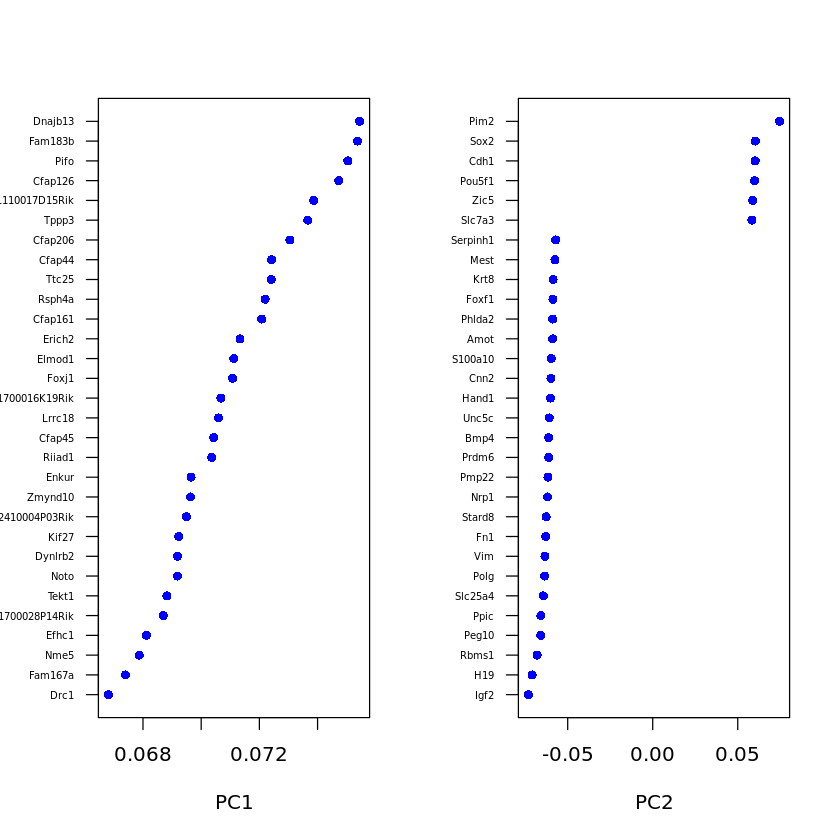

In [32]:
PrintPCA(object = seuset_pca, pcs.print = 1:5, genes.print = 5, use.full = FALSE)
VizPCA(object = seuset_pca, pcs.use = 1:2)

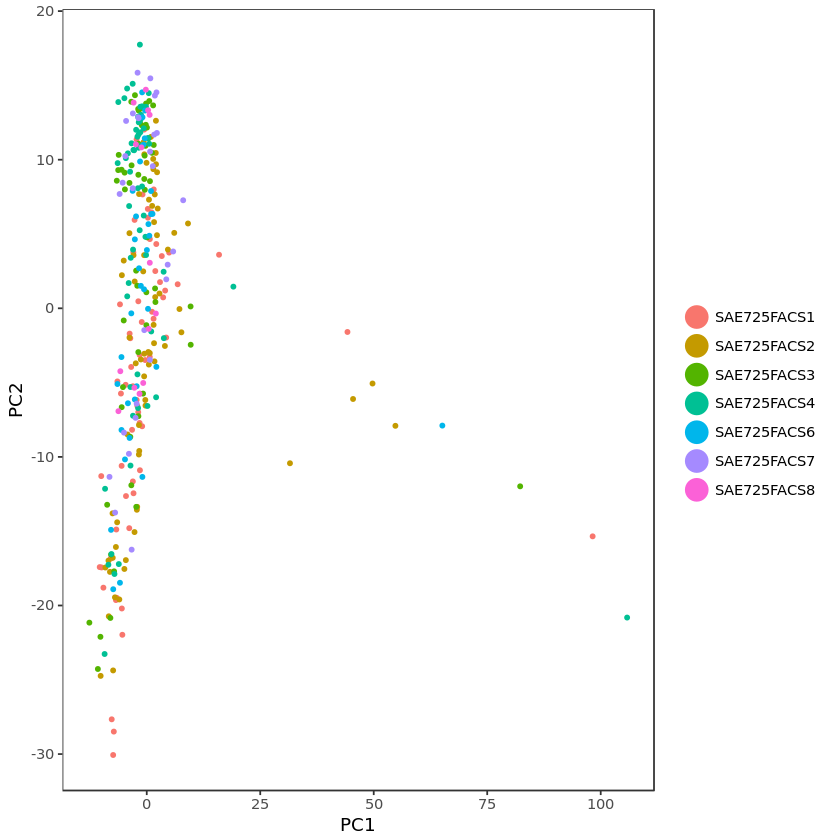

In [38]:
PCAPlot(object = seuset_pca, dim.1 = 1, dim.2 = 2, num.genes = 500)

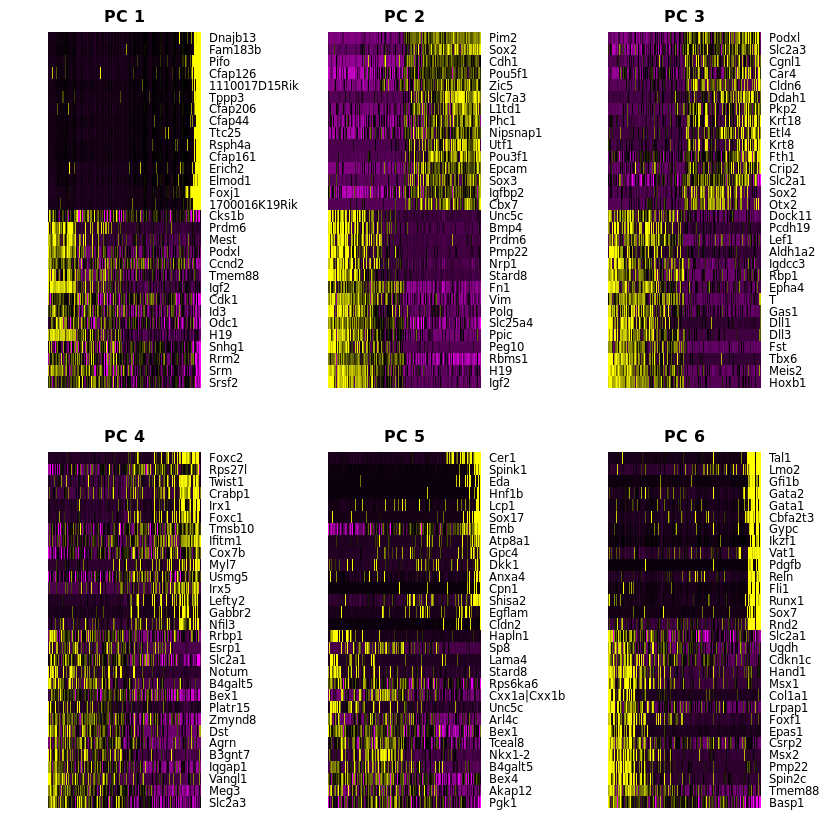

In [40]:
PCHeatmap(
    object = seuset_pca, 
    pc.use = 1:6, 
    cells.use = 200, 
    do.balanced = TRUE, 
    label.columns = FALSE,
    use.full = FALSE
)

In [42]:
seuset_js <- JackStraw(
    object = seuset_pca,
    num.replicate = 100, 
)

  |======================================================================| 100%
Time Elapsed:  1.29199455579122 mins 



Warning message:
“Removed 22221 rows containing missing values (geom_point).”

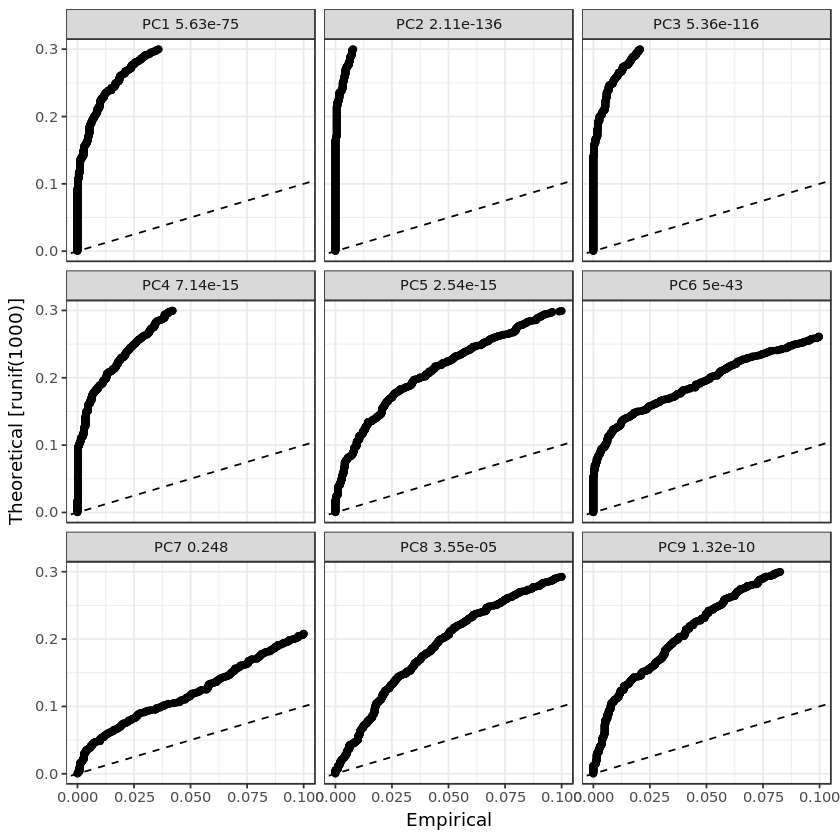

In [43]:
JackStrawPlot(object = seuset_js, PCs = 1:9)

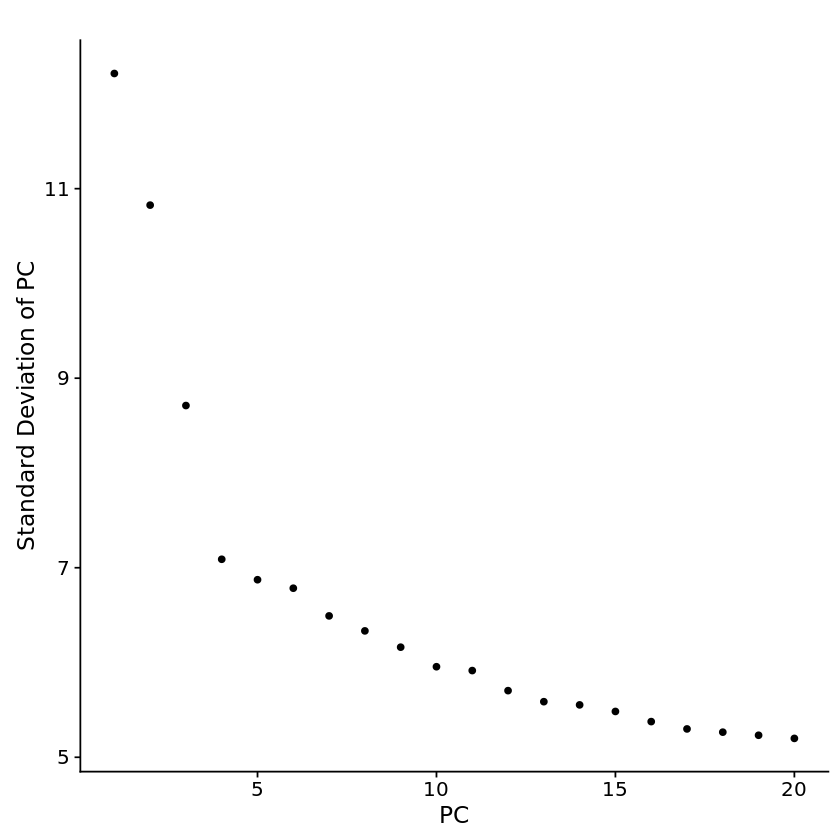

In [44]:
# PCs 1-3 v sig, PCs 4-6 less so
PCElbowPlot(object = seuset_js)
# Elbow shows that 4th PC is the cutoff

In [52]:
seuset_fc <- FindClusters(
    object = seuset_js, 
    reduction.type = "pca", 
    dims.use = 1:6, 
    resolution = 1.0, 
    print.output = 0, 
    save.SNN = TRUE
)

In [53]:
table(seuset_fc@ident)


  0   1   2   3   4 
100  80  72  57  17 

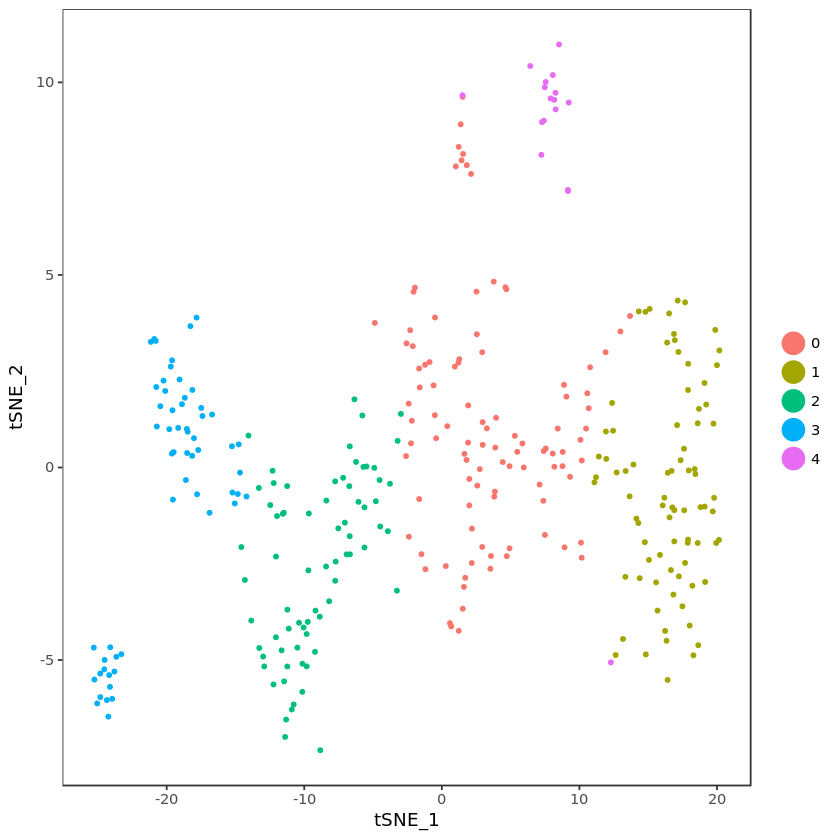

In [54]:
seuset_tsne <- RunTSNE(
    object = seuset_fc,
    dims.use = 1:6,
    do.fast = TRUE
)
TSNEPlot(object = seuset_tsne)

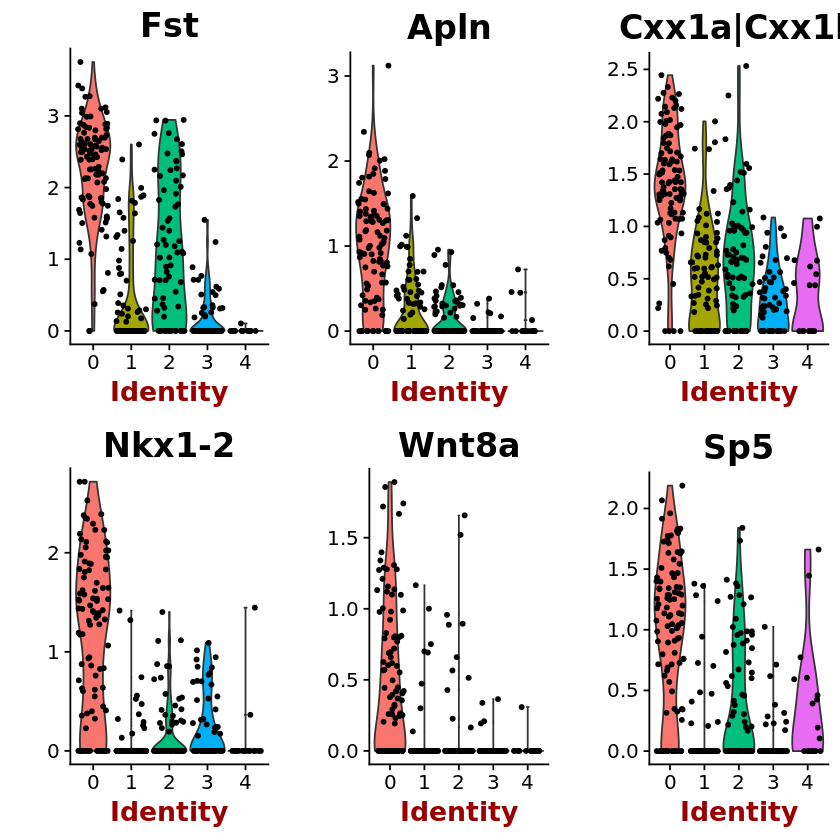

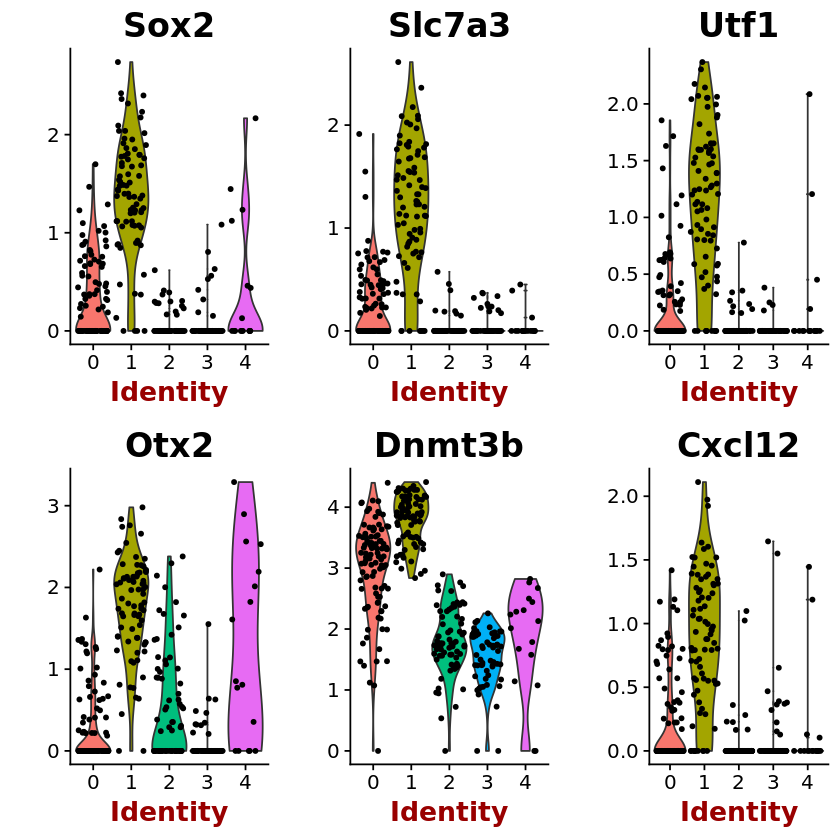

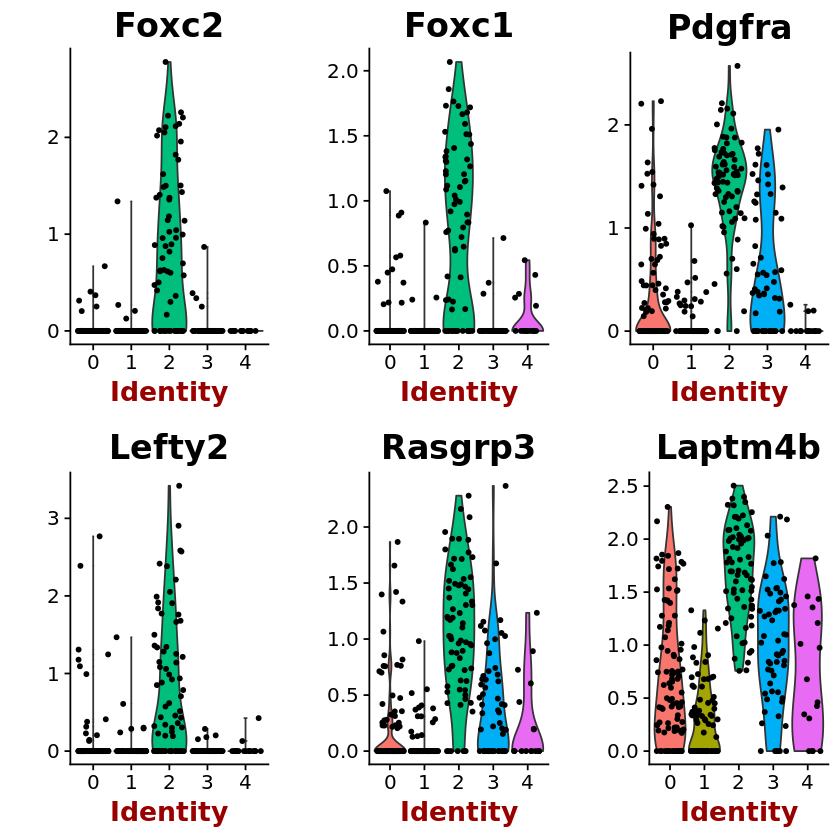

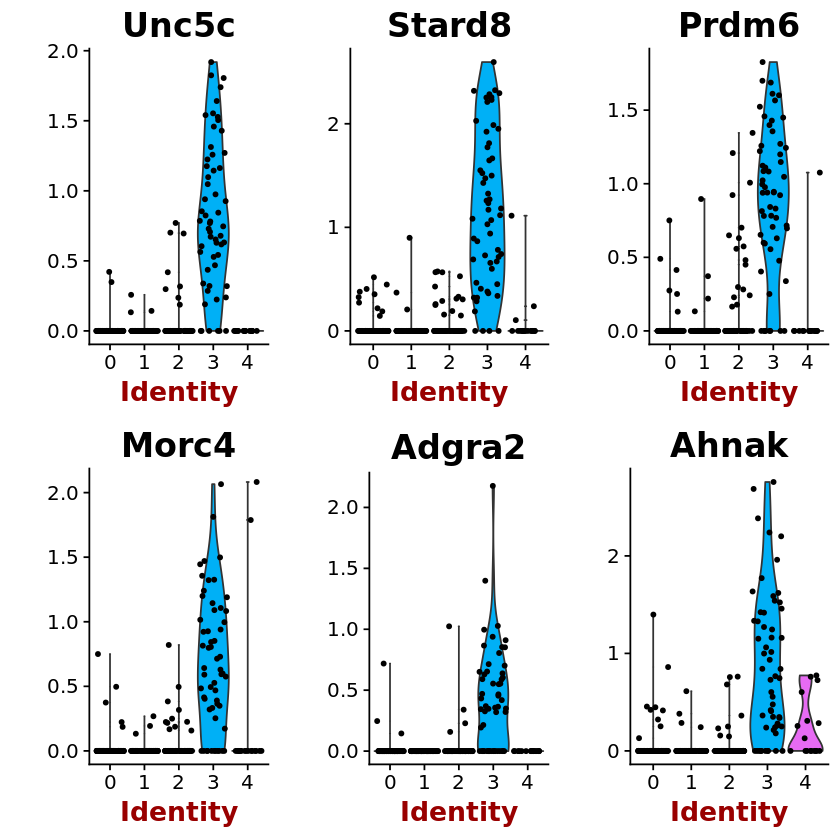

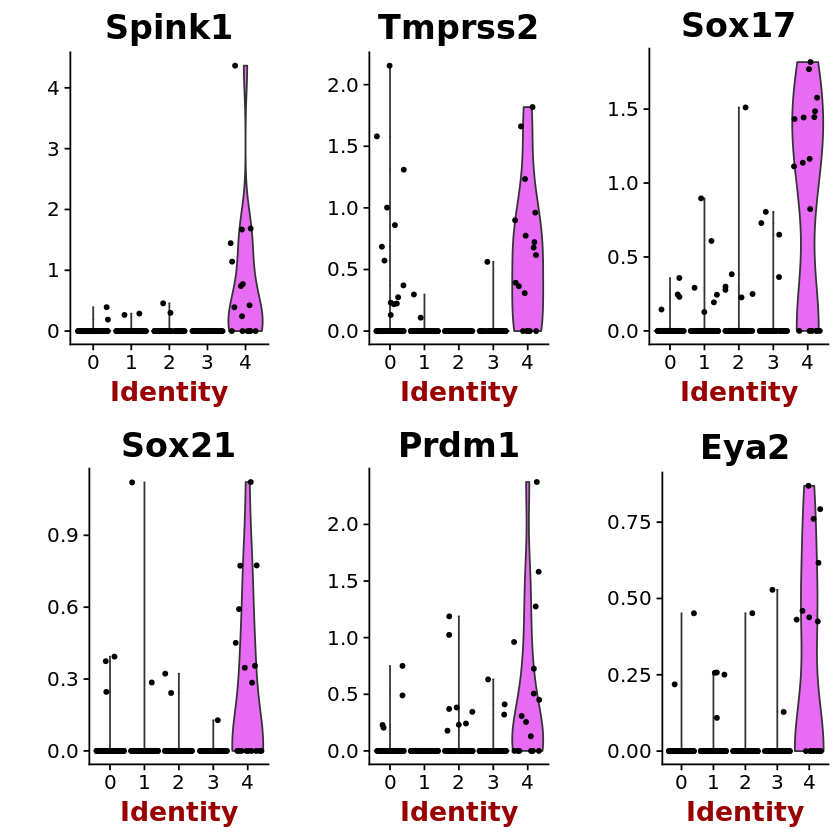

In [58]:
markers0 <- FindMarkers(seuset_tsne, 0)
markers1 <- FindMarkers(seuset_tsne, 1)
markers2 <- FindMarkers(seuset_tsne, 2)
markers3 <- FindMarkers(seuset_tsne, 3)
markers4 <- FindMarkers(seuset_tsne, 4)
VlnPlot(object = seuset_tsne, features.plot = rownames(markers0)[1:6])
VlnPlot(object = seuset_tsne, features.plot = rownames(markers1)[1:6])
VlnPlot(object = seuset_tsne, features.plot = rownames(markers2)[1:6])
VlnPlot(object = seuset_tsne, features.plot = rownames(markers3)[1:6])
VlnPlot(object = seuset_tsne, features.plot = rownames(markers4)[1:6])

Cluster0Cluster1

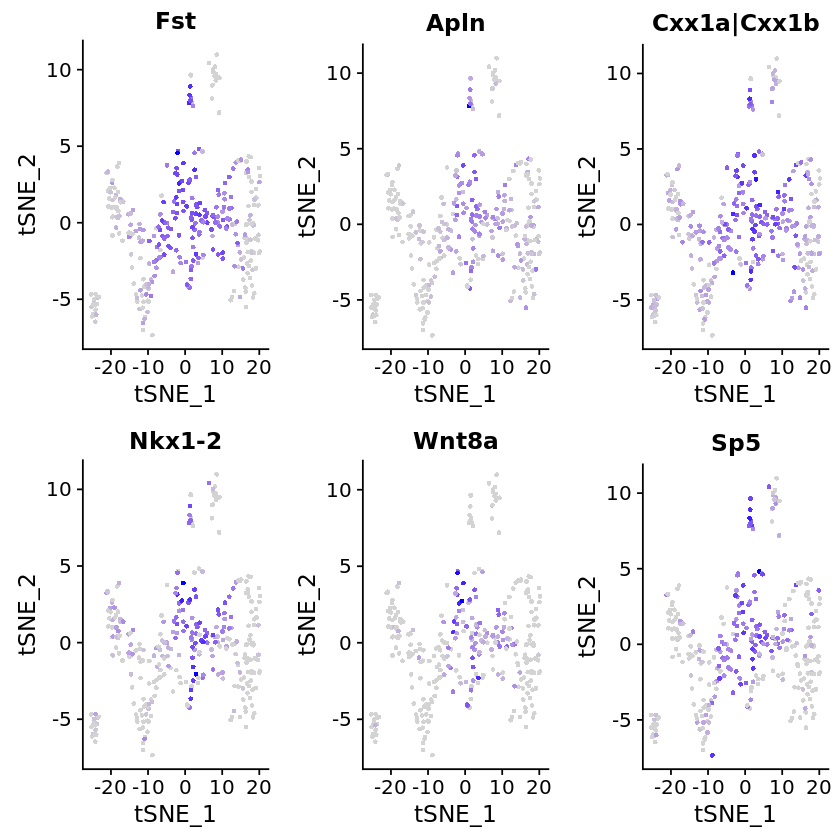

Cluster2

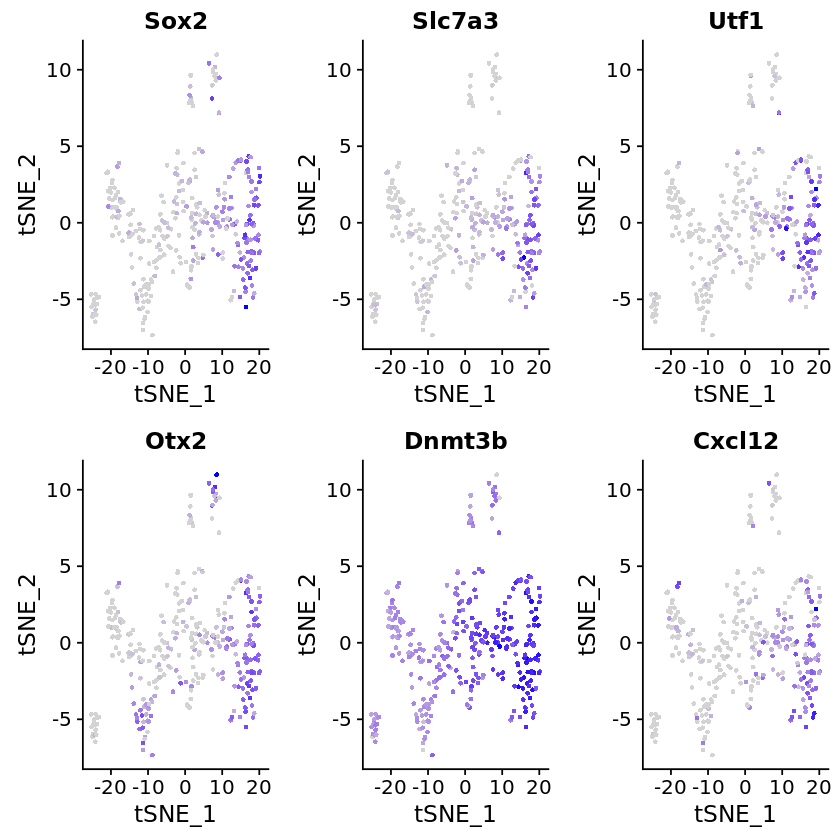

Cluster3

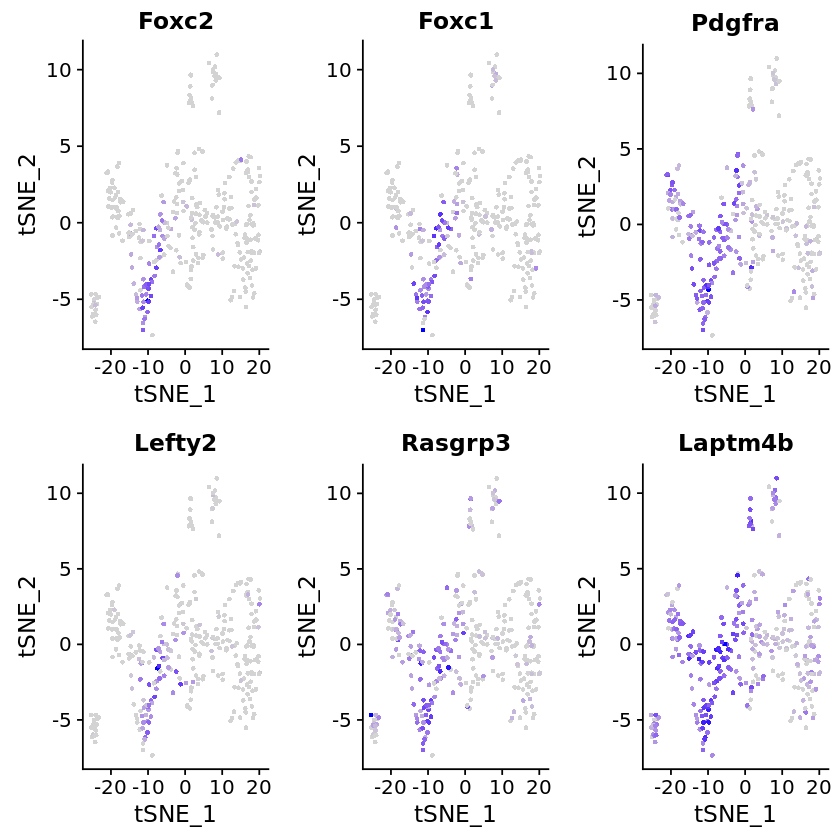

Cluster4

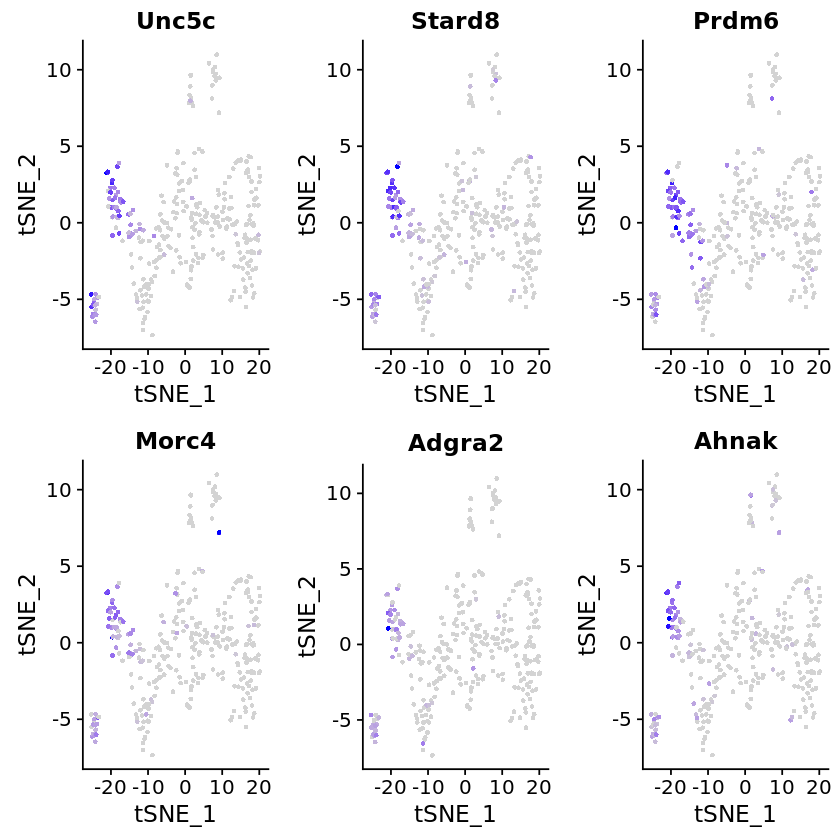

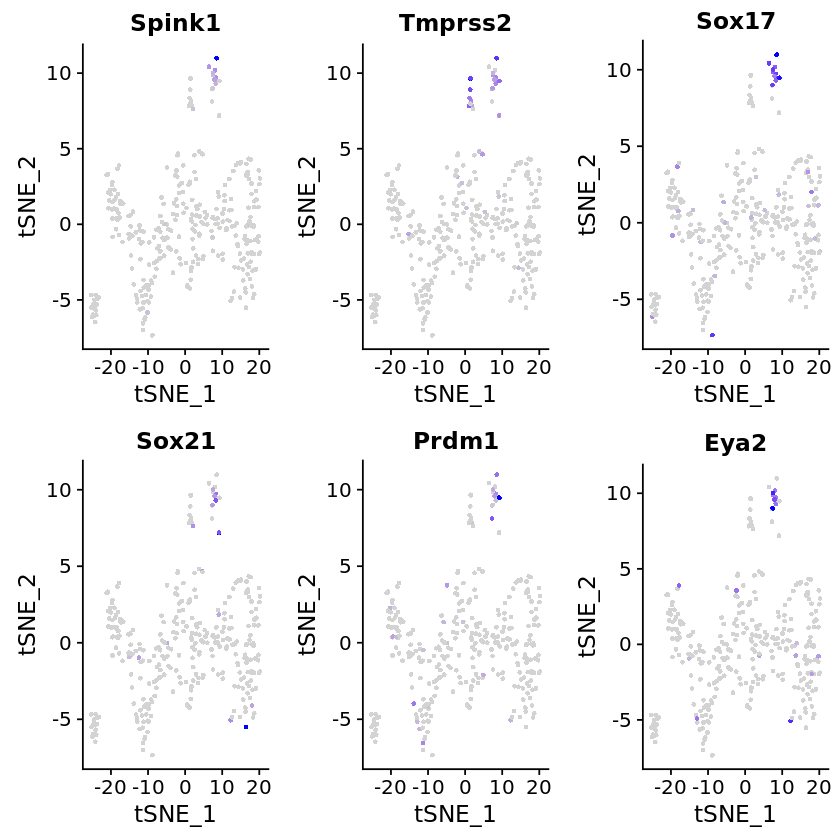

In [61]:
# Looking at first 10 in each marker list
cat("Cluster0")
FeaturePlot(
    seuset_tsne, 
    head(rownames(markers0)), 
    cols.use = c("lightgrey", "blue"), 
    nCol = 3
)
cat("Cluster1")
FeaturePlot(
    seuset_tsne, 
    head(rownames(markers1)), 
    cols.use = c("lightgrey", "blue"), 
    nCol = 3
)
cat("Cluster2")
FeaturePlot(
    seuset_tsne, 
    head(rownames(markers2)), 
    cols.use = c("lightgrey", "blue"), 
    nCol = 3
)
cat("Cluster3")
FeaturePlot(
    seuset_tsne, 
    head(rownames(markers3)), 
    cols.use = c("lightgrey", "blue"), 
    nCol = 3
)
cat("Cluster4")
FeaturePlot(
    seuset_tsne, 
    head(rownames(markers4)), 
    cols.use = c("lightgrey", "blue"), 
    nCol = 3
)

In [62]:
markers <- FindAllMarkers(
    object = seuset_tsne, 
    only.pos = TRUE, 
    min.pct = 0.25, 
    thresh.use = 0.25
)

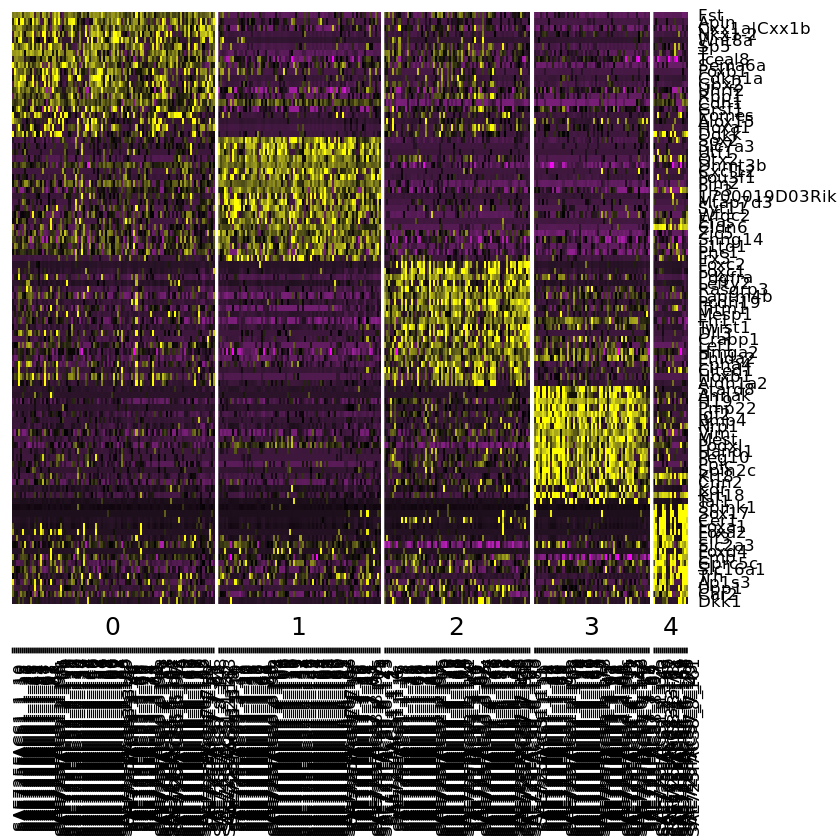

In [74]:
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_logFC)
#top10$gene

DoHeatmap(
    object = seuset_tsne, 
    genes.use = gene_list, 
    slim.col.label = F, 
    remove.key = TRUE
)